In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import rich
print = rich.print
print("OpenCV version:", cv2.__version__)
print("Numpy version:", np.__version__)

OpenCV version: 4.8.1

Numpy version: 1.26.0

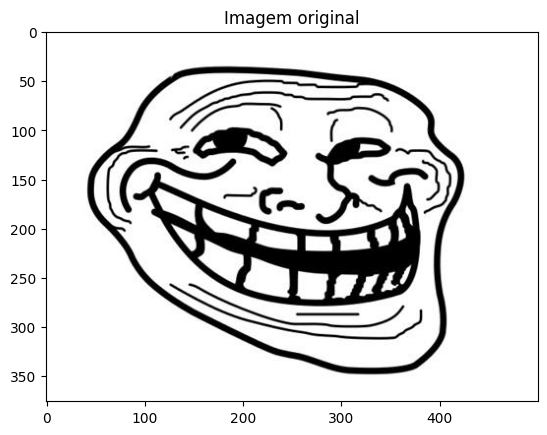

In [2]:
image = cv2.imread("./imgs/Trollface.jpg")

plt.imshow(image)
plt.title("original Image")
plt.show()

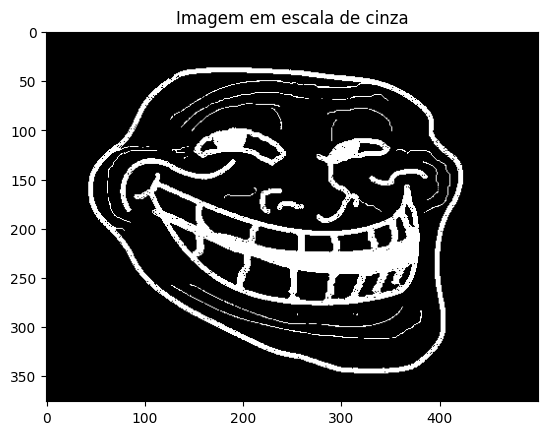

In [6]:
# Convert to B and W only img with a threshold of 127
bw = cv2.threshold(image, 12, 255, cv2.THRESH_BINARY)[1]
bw = cv2.cvtColor(bw, cv2.COLOR_BGR2GRAY)
# invert the image
bw = cv2.bitwise_not(bw)
plt.imshow(bw , cmap="gray")
plt.title("Image in grey scale")
plt.show()

In [7]:
def expansion(BW_img: np.ndarray,kernel: np.ndarray) -> np.ndarray:
    # Create a new image with the same size of the original
    img_shape = BW_img.shape
    # Create a new image with the same size of the original
    new_img = np.zeros(img_shape)
    # Get the size of the kernel
    kernel_shape = kernel.shape
    # Get the center of the kernel
    centers = [int((kernel_shape[0]-1)/2),int((kernel_shape[1]-1)/2)]
    centerx = centers[0]
    centery = centers[1]
    # Iterate over the image
    for x in range( centerx,img_shape[0] - centerx):
        for y in range(centery,img_shape[1] - centery):
            # Iterate over the kernel
            slice_img = BW_img[x-centery:x+centery+1,y-centery:y+centery+1]
            # check if any pixel in the slice matches the kernel
            does_match = (kernel * slice_img).sum() > 0
            if(does_match):
                new_img[x,y] = 255
    return new_img

def erosion(kernel: np.ndarray, bw: np.ndarray) -> np.ndarray:
    kernel_w = kernel.shape[0]
    kernel_h = kernel.shape[1]
    half_w = kernel_w // 2
    half_h = kernel_h // 2
    erosion = np.zeros(bw.shape, np.uint8)
    kernel_center = kernel[half_w, half_h]
    for x in range(half_w, bw.shape[0]-half_w):
        for y in range(half_h, bw.shape[1]-half_h):
            # only keep what matches the kernel
            img_slice = bw[x-half_w:x+half_w+1, y-half_h:y+half_h+1]
            if np.array_equal(img_slice, kernel):
                erosion[x,y] = kernel_center
    return erosion

In [16]:
kernel = np.ones((3,3),np.uint8)
print("Kernel:")
print(kernel)
# Apply the expansion then the erosion
expanded = expansion(bw,kernel)
final = erosion(kernel,expanded)

Kernel:

[[1 1 1]
 [1 1 1]
 [1 1 1]]

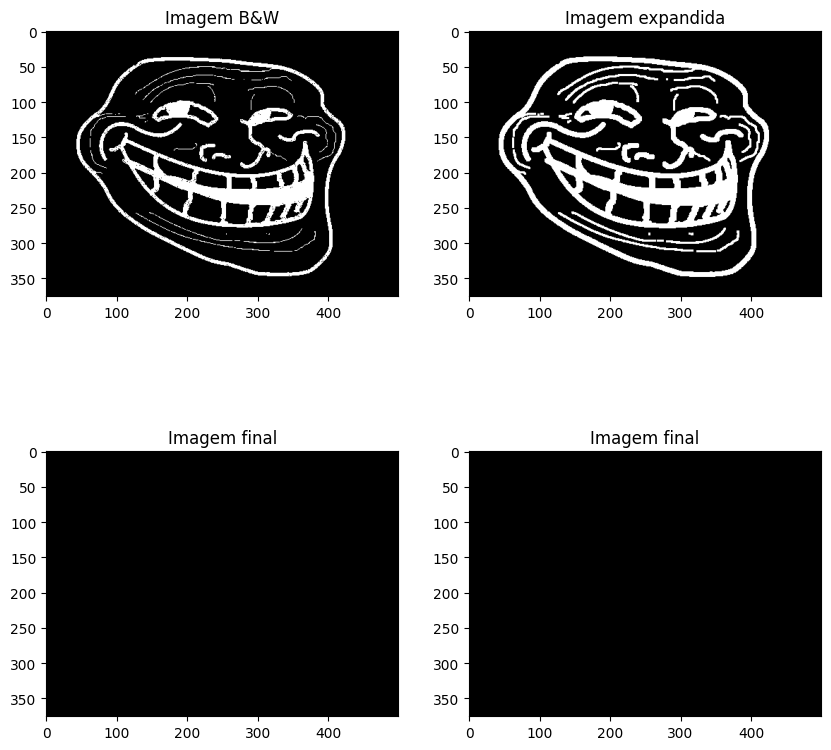

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
ax1.imshow(bw, cmap="gray")
ax1.set_title("Image B&W")
ax2.imshow(expanded, cmap="gray")
ax2.set_title("expanded Image")
ax3.imshow(final, cmap="gray")
ax3.set_title("Final Image")
ax4.imshow(final, cmap="gray")
ax4.set_title("Final Image")
plt.show()
